#ผู้จัดทำ
###630710806 นุรฮัสนีดา เจ๊ะโว๊ะ
###630710818 สุรีรัตน์ เอี่ยมทอง

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [ ]:
print(os.getcwd())

/content


In [ ]:
import IPython.display as ipd
filepath = "/content/drive/MyDrive/3 Sub-Project /Project_/audio/sample_dataset/train/Disease (1).wav"
ipd.Audio(filepath)

4000
[   0    0    0 ... 3708 4240 4751]


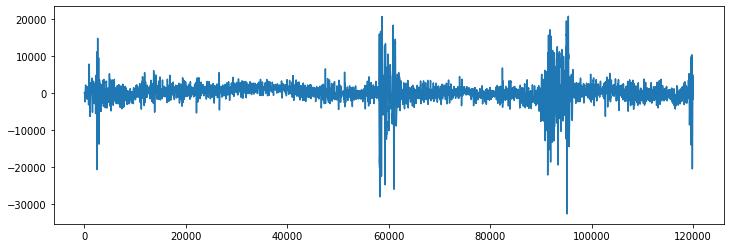

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filepath)
print(wave_sample_rate)
print(wave_audio)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [ ]:
%pylab inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df = pd.read_csv('Data annotation.csv') 
df.head()

,Age,Gender,Location,Sound type,Disease,Diagnosis
0,70,M,P L L,I E W,Asthma,Yes
1,52,F,P L L,E W,Asthma,Yes
2,50,F,P L L,I E W,Asthma,Yes
3,72,F,P R L,I C,Heart Failure + Lung Fibrosis,Yes
4,71,M,P R L,I C E W,Heart Failure + COPD,Yes


In [ ]:
df

,Age,Gender,Location,Sound type,Disease,Diagnosis
0,70,M,P L L,I E W,Asthma,Yes
1,52,F,P L L,E W,Asthma,Yes
2,50,F,P L L,I E W,Asthma,Yes
3,72,F,P R L,I C,Heart Failure + Lung Fibrosis,Yes
4,71,M,P R L,I C E W,Heart Failure + COPD,Yes
...,...,...,...,...,...,...
107,63,M,P R L,E W,COPD,Yes
108,26,M,P L M,N,N,No
109,62,M,P L L,E W,COPD,Yes
110,51,M,P R L,E W,COPD,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         112 non-null    int64 
 1   Gender      112 non-null    object
 2   Location    112 non-null    object
 3   Sound type  112 non-null    object
 4   Disease     112 non-null    object
 5   Diagnosis   112 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.4+ KB


In [ ]:
df.describe()

,Age
count,112.000000
mean,50.455357
std,19.238142
min,12.000000
25%,35.250000
50%,52.000000
75%,67.250000
max,90.000000


In [ ]:
df["Diagnosis"].value_counts()

Yes    77
No     35
Name: Diagnosis, dtype: int64

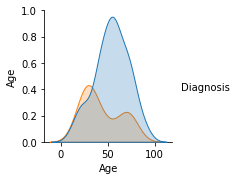

In [ ]:
sns.pairplot(df, hue = "Diagnosis")

In [ ]:
# df.corr()

In [ ]:
df.columns

Index(['Age', 'Gender', 'Location', 'Sound type', 'Disease', 'Diagnosis'], dtype='object')

In [ ]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (112, 6)


Yes    77
No     35
Name: Diagnosis, dtype: int64

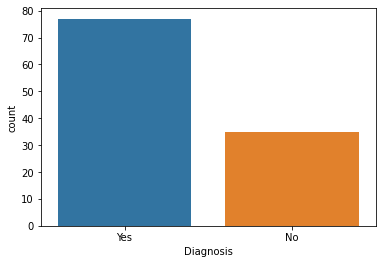

In [ ]:
sns.countplot(x = "Diagnosis", data = df)
df.loc[:,"Diagnosis"].value_counts()

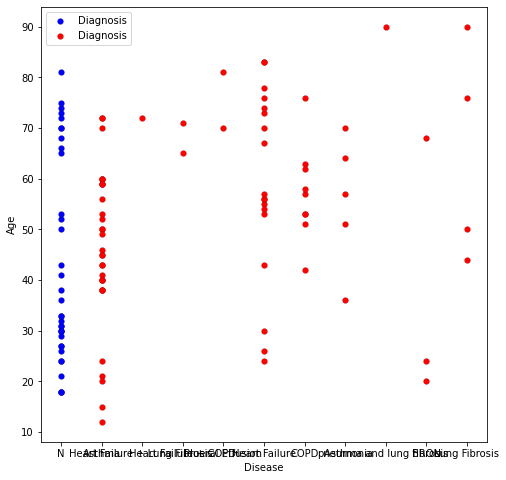

In [ ]:
normal = df[df.Diagnosis == "No"].iloc[:100,:]
disease = df[df.Diagnosis == "Yes"].iloc[:100,:]

plt.figure(figsize = (8,8))
plt.scatter(normal.Disease, normal.Age, color = "blue", label = "Diagnosis", linewidths = 0.1, edgecolor = "black")
plt.scatter(disease.Disease, disease.Age, color = "red", label = "Diagnosis", linewidths = 0.1, edgecolor = "black")
plt.xlabel("Disease")
plt.ylabel("Age")
plt.legend()
plt.show()

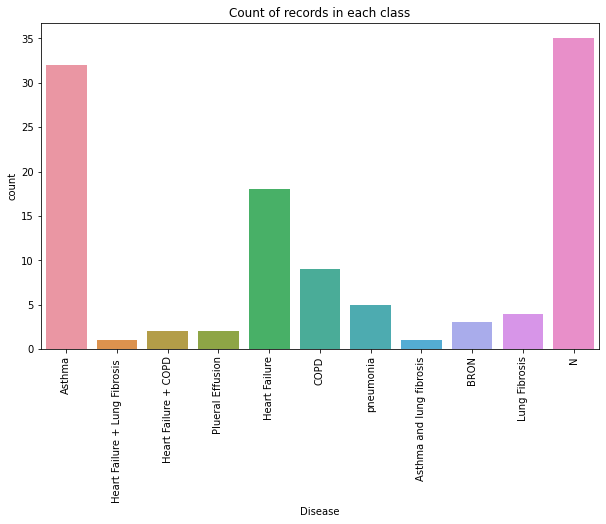

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(df['Disease'])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<BarContainer object of 2 artists>

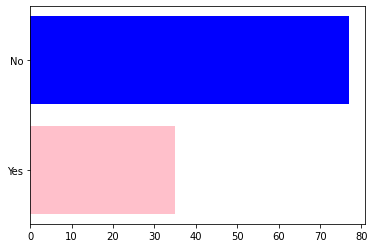

In [ ]:
group_class = df.groupby('Diagnosis').count()
plt.barh(['Yes', 'No'], group_class['Gender'].values, color=['pink', 'blue'] )

Text(0.5, 1.0, 'Number of transactions by Time step')

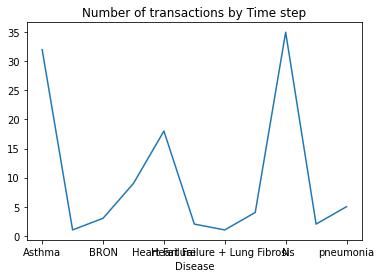

In [ ]:
group_feature = df.groupby('Disease').count()
group_feature['Age'].plot()
plt.title('Number of transactions by Time step')